In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sbn
import scipy.stats as stats
current_palette = sbn.color_palette("Set1",12)
sbn.set_palette(current_palette)

In [3]:
def plot_gaussian_mixture(v, size):
    # now the mixed gaussians
    loc_a, scale_a, size_a = (v[0], v[1], int(v[2]))
    loc_b, scale_b, size_b = (v[3], v[4],int(v[5])) 
    x2 = np.concatenate([np.random.normal(loc=loc_a, scale=scale_a, size=size_a), np.random.normal(loc=loc_b, scale=scale_b, size=size_b)])

    x2_eval = np.linspace(x2.min() - 1, x2.max() + 1, 500)
    bimodal_pdf =  stats.norm.pdf(x2_eval, loc=loc_a, scale=scale_a) * float(size_a) / x2.size + \
                stats.norm.pdf(x2_eval, loc=loc_b, scale=scale_a) * float(size_b) / x2.size
    return bimodal_pdf, x2_eval, x2

In [4]:
mix_values = []
v = np.array([-2.5,0.5,9000,2.5,0.5,1000])
mix_values.append(v)
for i in range(4):
    old_v = mix_values[i]
    v = np.array([old_v[0]+0.5, old_v[1],old_v[2]-1000, old_v[3]-0.5, old_v[4],old_v[5]+1000])
    mix_values.append(v)
for i in range(4,8):
    old_v = mix_values[i]
    v = np.array([old_v[0]-0.5, old_v[1],old_v[2]-1000, old_v[3]+0.5, old_v[4],old_v[5]+1000])
    mix_values.append(v)
ascending_alpha = np.linspace(0.2,0.8,9)
descending_alpha = np.linspace(0.8,0.2,9)

In [5]:
loc1, scale1, size1 = (-3, 0.5, 1000000)
loc3, scale3, size3 = (3, 0.5, 1000000)
x1 = np.random.normal(loc=loc1, scale=scale1, size=size1)
x1_eval = np.linspace(x1.min() - 1, x3.max() + 1, 500)
x3 = np.random.normal(loc=loc3, scale=scale3, size=size3)
x3_eval = np.linspace(x1.min() - 1, x3.max() + 1, 500)




fig = figure(figsize(17,5))
plot(x1_eval,stats.norm.pdf(x1_eval, loc1, scale1), color = current_palette[1], lw=3)
plt.fill_between(x1_eval,stats.norm.pdf(x1_eval, loc1, scale1), alpha=0.1, color = current_palette[1])
plot(x3_eval,stats.norm.pdf(x3_eval, loc3, scale3), color = current_palette[4], lw=3)
plt.fill_between(x3_eval,stats.norm.pdf(x3_eval, loc3, scale3), alpha=0.1, color = current_palette[4])
#sbn.kdeplot(x1, shade=True, lw=3, color=current_palette[0])
#sbn.kdeplot(x3, shade=True, lw=3, color=current_palette[1])
lines = ["-","-","--","--","-.","-.",":",":", "-","-"]
count = 0
for v in mix_values[::2]:
    print(v)
    pdf, x2_eval, x2 = plot_gaussian_mixture(v, 10000)
    opposite_count = -1
    plot(x2_eval[:250], pdf[:250], c=current_palette[1], alpha=descending_alpha[count],ls=lines[count], lw=2)
    plot(x2_eval[250:], pdf[250:], c=current_palette[4], alpha=ascending_alpha[count], ls= lines[count], lw=2)
    count = count+2
xlim(-4.5,4.5)
sbn.despine(top=True, right=True, left=True, bottom=True, trim=True)
savefig("myfig.svg")

NameError: name 'x3' is not defined

In [224]:
current_palette.as_hex()

['#e41a1c',
 '#377eb8',
 '#4daf4a',
 '#984ea3',
 '#ff7f00',
 '#ffff33',
 '#a65628',
 '#f781bf',
 '#999999',
 '#e41a1c',
 '#377eb8',
 '#4daf4a']

In [27]:
loc1, scale1, size1 = (-3, 1, 175)
loc2, scale2, size2 = (-3, 1, 175) 
x2 = np.concatenate([np.random.normal(loc=loc1, scale=scale1, size=size1), np.random.normal(loc=loc2, scale=scale2, size=size2)])

In [28]:
x_eval = np.linspace(x2.min() - 1, x2.max() + 1, 500)
kde = stats.gaussian_kde(x2)

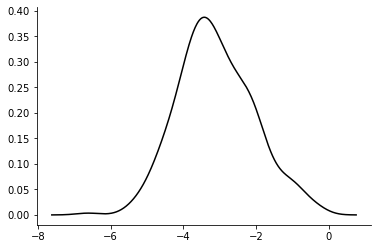

In [29]:
plot(x_eval, kde(x_eval), 'k-', label="Scott's Rule")
sbn.despine()